In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn import tree
import sklearn.metrics

In [2]:
#Classification trees
raw_heart = np.loadtxt('reprocessed.hungarian.data.txt')

In [3]:
#13 is our label (1=heart disease, 0=no heart disease)
data_heart=pd.DataFrame(raw_heart)
data_heart.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,-9.0,-9.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,-9.0,-9.0,3.0
4,54.0,1.0,3.0,150.0,-9.0,0.0,0.0,122.0,0.0,0.0,-9.0,-9.0,-9.0,0.0


In [4]:
#removes Nan values
data_heart = data_heart.dropna(axis=0)
disease = data_heart[13]
#gets the index where the element >1
mask = disease > 1.0
#replaces all values bigger than 1.0 with 1.0
disease.loc[mask] = 1.0

#drops all qualitative features
h_pred = data_heart.drop(13, axis=1)
#saves the keys for predictors
h_key = h_pred.keys()

In [5]:
#perform a train test split on the data (half and half)
x_train, x_test, y_train, y_test = train_test_split(h_pred,disease,test_size=0.5)

In [6]:
print(np.shape(x_train))

(147, 13)


In [ ]:
n_trees = np.linspace(1,100,100)
#error is the cross entropy function
error = np.zeros(len(n_trees))
forest_err=np.zeros(len(n_trees))
oob_err=np.zeros(len(n_trees))
oob_forerr=np.zeros(len(n_trees))

for i in range(1,len(n_trees)):
    #samples are drawin with replacement (bootstraping)
    bagger = BaggingClassifier(n_estimators=i)
    bagger.fit(x_train,y_train)
    #gets indices for samples used in training
    out_bag=(bagger.estimators_samples_)[0]
    #in bag pred
    y_pred=bagger.predict(x_test)
    prob=bagger.predict_proba(x_test)[:,1]
    #out of bag prob
    out_prob=bagger.predict_proba(x_train.drop(x_train.index[out_bag]))[:,1]
    
    #random forest
    forest = RandomForestClassifier(n_estimators=i)
    forest.fit(x_train,y_train)
    
    #out of bag forest
    oob_forest = RandomForestClassifier(n_estimators=i,oob_score=True)
    oob_forest.fit(x_train,y_train)
    
    #oob_forest=np.invert(forest.estimators_)[0]
    forest_prob = forest.predict_proba(x_test)[:,1]
    #oobforest_prob = forest.predict_proba(x_train.loc[out_forest])[:,1]
    oobforest_prob = oob_forest.predict_proba(x_test)[:,1]
    
    #cross entropy is used ass the error
    error[i]=sklearn.metrics.log_loss(y_test,prob, normalize=True)
    oob_err[i]=sklearn.metrics.log_loss(y_train.drop(y_train.index[out_bag]),out_prob, normalize=True)
    forest_err[i]=sklearn.metrics.log_loss(y_test,forest_prob, normalize=True)
    oob_forerr[i]=sklearn.metrics.log_loss(y_test,oobforest_prob, normalize=True)

In [ ]:
one_reg = tree.DecisionTreeClassifier()
one_reg.fit(x_train, y_train)
one_prob= one_reg.predict_proba(x_test)
one_error = sklearn.metrics.log_loss(y_test,one_prob, normalize=True)

plt.plot(n_trees,error,label='test bagging')
plt.plot(n_trees, oob_err,label='oob bagging')
plt.plot(n_trees, forest_err,label='test random forest')
plt.plot(n_trees, oob_forerr, label='oob random forest')
plt.xlabel('Number of trees')
plt.ylabel('error')
plt.hlines(one_error,xmin=1,xmax=len(n_trees))
plt.title('Figure 8.8')
plt.legend()

In [17]:
#Classification
data_oj = pd.read_csv('OJ.csv')
data_oj.head()

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [18]:
data_oj = data_oj.drop('Unnamed: 0', axis=1)
#binary output CH=1=citrus hill, MM=0 = purchase
data_oj['Purchase']=[0 if label=='MM' else 1 for label in data_oj['Purchase']]


In [19]:
data_oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,1,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,1,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,0,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,1,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [20]:
purchase = data_oj['Purchase']
#drops all qualitative features
features = data_oj.drop(['Store7','Purchase'], axis=1)
#saves the keys for predictors
key = features.keys()
print(len(key))
#perform a train test split on the data (half and half)
x_train2, x_test2, y_train2, y_test2 = train_test_split(features,purchase,test_size=0.5)

16


In [21]:
#calculates the error for several values fractions of predictors
n_trees = np.linspace(1,100,100)
#error is the cross entropy function
#m=p where p is the number of predictors and m is number of predictors chosen for training
errorp = np.zeros(len(n_trees))
#m=p/2
error2=np.zeros(len(n_trees))
#m=sqr(p)
error_sqr=np.zeros(len(n_trees))

for i in range(1,len(n_trees)):
    if(i%50==0):
        print(i)
    #m=sqr(p)
    forest_sqr = RandomForestClassifier(n_estimators=i)
    forest_sqr.fit(x_train2,y_train2)
    sqr_prob = forest_sqr.predict_proba(x_test2)[:,1]
    
    #m=p/2
    forest2 = RandomForestClassifier(n_estimators=i, max_features=8)
    forest2.fit(x_train2,y_train2)
    two_prob = forest2.predict_proba(x_test2)[:,1]
    #m=p
    forestp = RandomForestClassifier(n_estimators=i, max_features=16)
    forestp.fit(x_train2,y_train2)
    p_prob = forestp.predict_proba(x_test2)[:,1]
    
    #cross entropy is used ass the error
    error_sqr[i]=sklearn.metrics.log_loss(y_test2,sqr_prob, normalize=True)
    error2[i]=sklearn.metrics.log_loss(y_test2,two_prob, normalize=True)
    errorp[i]=sklearn.metrics.log_loss(y_test2,p_prob, normalize=True)

50


Text(0.5, 1.0, 'Figure 8.10')

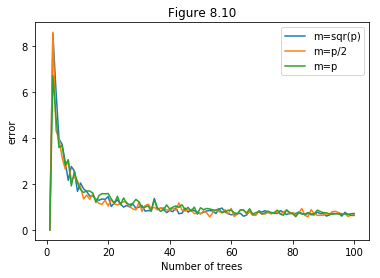

In [22]:

plt.plot(n_trees,error_sqr,label='m=sqr(p)')
plt.plot(n_trees,error2,label='m=p/2')
plt.plot(n_trees,errorp,label='m=p')
plt.legend()
plt.xlabel('Number of trees')
plt.ylabel('error')
plt.title('Figure 8.10')

In [25]:
#COMPARE MODELS IN OJ


In [26]:
#threshold values
thres=np.linspace(0.0,0.5,300)

#random forest
#200 estimators where chose based on the results from the last graph
forest_class= RandomForestClassifier(n_estimators=200)
forest_class.fit(x_train2,y_train2)
forest_proba=forest_class.predict_proba(x_test2)[:,1]

#classifciation tree
tree_class = tree.DecisionTreeClassifier()
tree_class.fit(x_train2, y_train2)
tree_proba= tree_class.predict_proba(x_test2)[:,1]

#logistic
logit= LogisticRegression(C=1e5, solver = 'newton-cg')
logit.fit(x_train2,y_train2)
logit_proba = logit.predict_proba(x_test2)[:,1]

#linear discriminant analysis
lda=LinearDiscriminantAnalysis()
lda.fit(x_train2,y_train2)
lda_proba= lda.predict_proba(x_test2)[:,1]

/srv/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [27]:
pre_forest, rec_forest, t_forest = sklearn.metrics.precision_recall_curve(y_test2, forest_proba)
pre_logit, rec_logit, t_logit = sklearn.metrics.precision_recall_curve(y_test2, logit_proba)
pre_tree, rec_tree, t_tree = sklearn.metrics.precision_recall_curve(y_test2, tree_proba)
pre_lda, rec_lda, t_lda = sklearn.metrics.precision_recall_curve(y_test2, lda_proba)


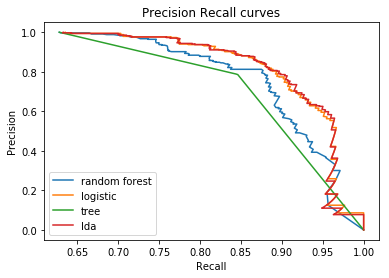

In [28]:
plt.plot(pre_forest,rec_forest,label='random forest')
plt.plot(pre_logit,rec_logit, label='logistic')
plt.plot(pre_tree,rec_tree, label='tree')
plt.plot(pre_lda,rec_lda, label='lda')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curves')
plt.legend()

In [29]:
#Calculates f1 values
f1_forest = 2*(pre_forest*rec_forest/(pre_forest+rec_forest))
f1_logit = 2*(pre_logit*rec_logit/(pre_logit+rec_logit))
f1_tree = 2*(pre_tree*rec_tree/(pre_tree+rec_tree))
f1_lda = 2*(pre_lda*rec_lda/(pre_lda+rec_lda))

print('f1 for forest =',max(f1_forest))
print('f1 for logit =',max(f1_logit))
print('f1 for class. tree =',max(f1_tree))
print('f1 for lda =',max(f1_lda))

f1 for forest = 0.8440629470672388
f1 for logit = 0.8705882352941177
f1 for class. tree = 0.8153846153846155
f1 for lda = 0.8723098995695839


In [30]:
#areas under curve
auc_forest=-np.trapz(pre_forest, rec_forest)
auc_logit=-np.trapz(pre_logit, rec_logit)
auc_tree=-np.trapz(pre_tree, rec_tree)
auc_lda = -np.trapz(pre_lda, rec_lda)

print('area under curve forest =', auc_forest)
print('area under curve logit =', auc_logit)
print('area under curve tree =', auc_tree)
print('area under curve lda =', auc_lda)

area under curve forest = 0.9036823765069635
area under curve logit = 0.9283213081062996
area under curve tree = 0.8833121348907258
area under curve lda = 0.9287060762814797


Dado que con LDA se obtienen los valores mas altos de F1 y area bajo la curva de precision-recall, entonces este es el mejor estimador para los datos